In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# OpenCV Filters

In the context of image processing, the terms "filter" and "kernel" are often used interchangeably. They both refer to a small matrix of weights that is convolved with an image to produce a filtered output.

### To Visualize popular filters, run filter_visualization.py file.

Below is the example of creating custom filter.

Text(0.5, 1.0, 'filterred')

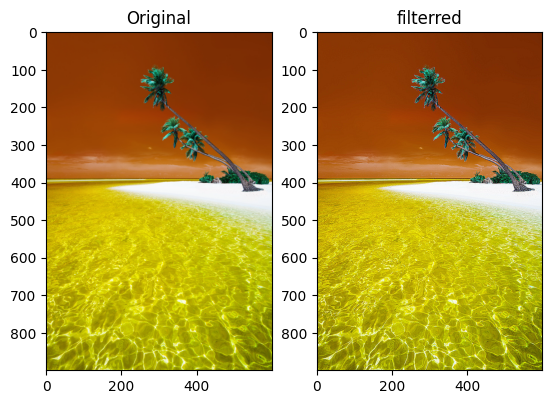

In [4]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Above filter is designed to enhance edges by emphasizing intensity differences.

def apply_custom_filter_color(frame, kernel):
    b, g, r = cv2.split(frame)
    b_filtered = cv2.filter2D(b, -1, kernel)
    g_filtered = cv2.filter2D(g, -1, kernel)
    r_filtered = cv2.filter2D(r, -1, kernel)
    filtered_frame = cv2.merge([b_filtered, g_filtered, r_filtered])
    return filtered_frame


image = cv2.imread('./data/beach-blue.jpg')
image_f = apply_custom_filter_color(image, kernel)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(image_f)
plt.title('filterred')


# Blurring and Sharpening
- Blurring is useful for reducing noise.

    -  Gaussian blur is a technique to reduce noise and detail by averaging pixel values in a neighborhood, weighted by a Gaussian kernel (a bell-shaped curve). A larger kernel size will result in more blurring, while a smaller kernel size will cause less blurring. Decreasing it (e.g., (3, 3)) will reduce the blurring effect.

    - (5, 5) is the size of the kernel, which determines how much the image will be blurred. Larger values result in a blurrier image.

    - 0 specifies the standard deviation for the Gaussian function. Here, it is automatically calculated based on the kernel size.

- Sharpening enhances edges.

    - The sharpening effect is controlled by the values in the convolution kernel applied with cv2.filter2D(). The larger the center value (the 5 in your kernel), the sharper the result. The surrounding values (-1 in your case) determine how much contrast is applied between the current pixel and its neighbors.

    - Increase sharpening by increasing the center value (e.g., changing 5 to 7 or 9).
    - Decrease sharpening by reducing the center value (e.g., changing 5 to 3 or 1).

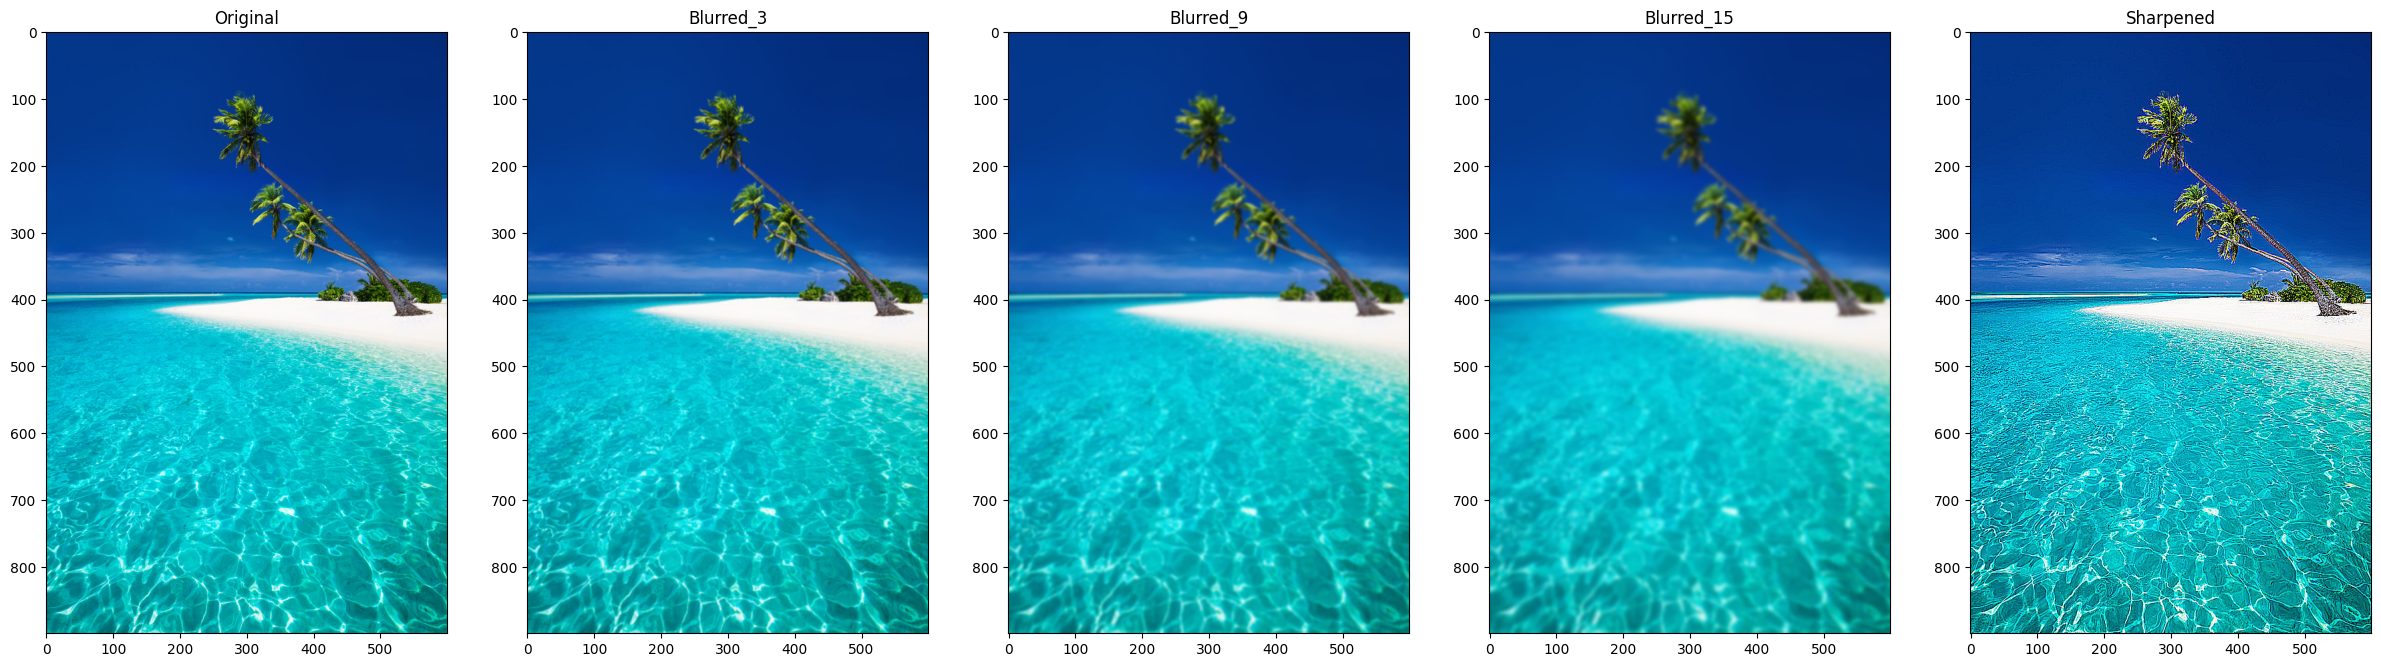

In [5]:
# Load the image
image = cv2.imread('./data/beach-blue.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernelSizes = [(3, 3), (9, 9), (15, 15)]


# Blurring the Image
blurred_3 = cv2.GaussianBlur(image_rgb, kernelSizes[0], 0)
blurred_9 = cv2.GaussianBlur(image_rgb, kernelSizes[1], 0)
blurred_15 = cv2.GaussianBlur(image_rgb, kernelSizes[2], 0)


# Sharpening the Image
# kernel_1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv2.filter2D(image_rgb, -1, kernel_2)
# sharpened = cv2.filter2D(sharpened, -1, kernel_2)
# Display the results
plt.figure(figsize=(30, 15))


plt.subplot(1, 5, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1, 5, 2)
plt.imshow(blurred_3)
plt.title('Blurred_3')

plt.subplot(1, 5, 3)
plt.imshow(blurred_9)
plt.title('Blurred_9')

plt.subplot(1, 5, 4)
plt.imshow(blurred_15)
plt.title('Blurred_15')

plt.subplot(1, 5, 5)
plt.imshow(sharpened)
plt.title('Sharpened')

plt.show()

# Enhancing Images: Contrast Adjustment, Sharpening

We will use CLAHE (Contrast Limited Adaptive Histogram Equalization) for improving contrast. CLAHE function is designed for grayscale images, but we will seperate each channel to LAB and apply for RGB as well

Text(0.5, 1.0, 'Enhanced Contrast')

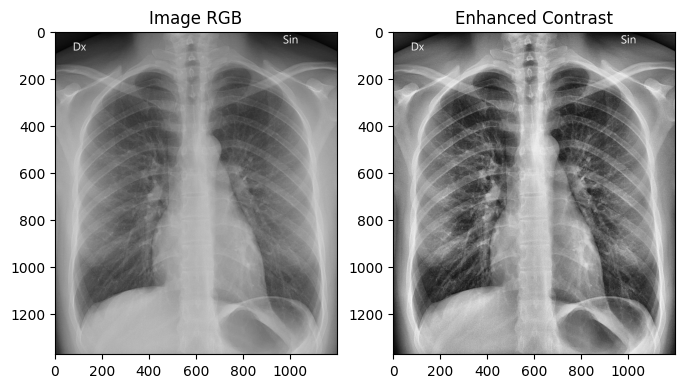

In [6]:
# CLAHE for greyscale

image = cv2.imread('./data/xray.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cl1 = clahe.apply(gray)

# Save the CLAHE-enhanced grayscale image
cv2.imwrite('./temp/clahe_contrast_enhanced.jpg', cl1)  # Save as a JPG file

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(cl1, cmap='gray')
plt.title('Enhanced Contrast')

To apply CLAHE on RGB images we will use LAB colour space. LAB color space is a color model designed to approximate human vision, often used for image processing tasks like color correction and contrast adjustment.

- L Channel (Lightness)
    - Values range from 0 (black) to 100 (white).
    - Modifying this channel affects the brightness and contrast of the image without altering its color.
- A Channel (Green-Red)
    - Represents the color information on the green to red axis.
    - Negative values indicate green, and positive values indicate red.
- B Channel (Blue-Yellow)
    - Represents the color information on the blue to yellow axis.
    - Negative values indicate blue, and positive values indicate yellow.

Text(0.5, 1.0, 'CLAHE Applied to RGB Image')

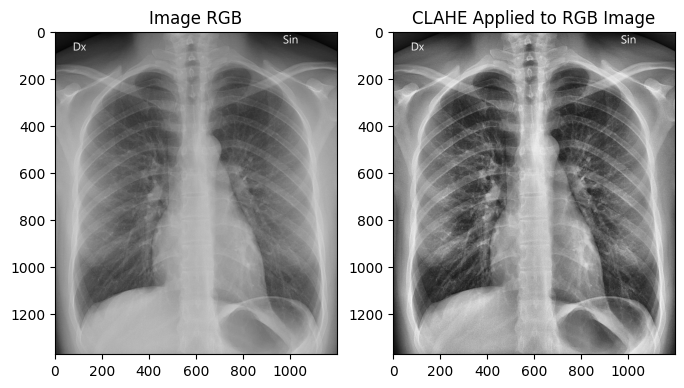

In [7]:
# Convert to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into its channels
l_channel, a_channel, b_channel = cv2.split(lab)

# Apply CLAHE to the L (lightness) channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(l_channel)

# Merge the CLAHE enhanced L-channel with the original a and b channels
lab_clahe = cv2.merge((cl1, a_channel, b_channel))

# Convert LAB back to RGB for display
image_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

# Display the result
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(image_clahe)
plt.title("CLAHE Applied to RGB Image")

# Adding Noise to image

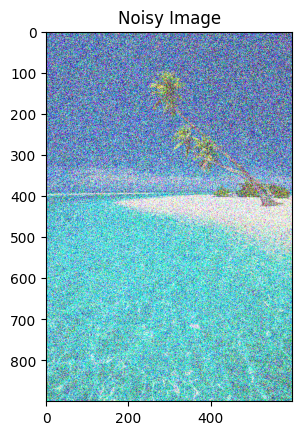

In [8]:
image = cv2.imread('./data/beach-blue.jpg')

noise = np.random.normal(80, 150, image.shape)
noisy_image = image + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)

plt.imshow(noisy_image)
plt.title("Noisy Image")
plt.show()

# Resize

(900, 600, 3)
(112, 75, 3)


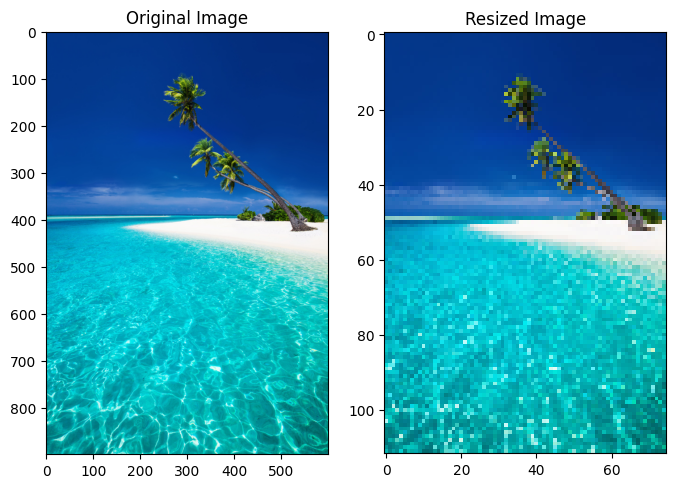

In [18]:
height, width, _ = image.shape

print(image.shape)

image_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_width = int(width/8)
new_height = int(height/8)
new_points = (new_width, new_height)
# new_points = (400, 400)
rescaled_img = cv2.resize(image_, new_points, interpolation= cv2.INTER_LINEAR)

print(rescaled_img.shape)

# Display the result
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(rescaled_img)
plt.title("Resized Image")
plt.show()

# Resize to different aspect ratio to 1:1

(900, 600, 3)
75 112
(75, 75, 3)
(112, 112, 3)


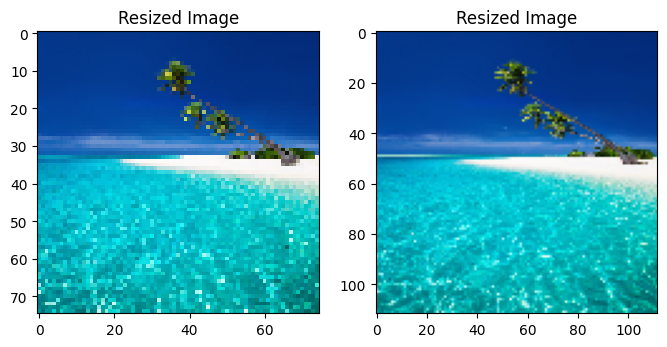

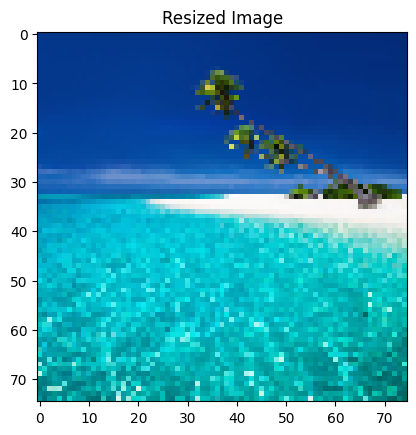

In [31]:
height, width, _ = image.shape

image_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_width = int(width/8)
new_height = int(height/8)

print(image.shape)
print(new_width, new_height)


# new_points = (new_width, new_height)
new_points1 = (new_width, new_width) # change the height to width
new_points2 = (new_height, new_height) # change the width to height

rescaled_img1 = cv2.resize(image_, new_points1, interpolation= cv2.INTER_LINEAR)
rescaled_img2 = cv2.resize(image_, new_points2, interpolation= cv2.INTER_LINEAR)

print(rescaled_img1.shape)
print(rescaled_img2.shape)


# Display the result
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(rescaled_img1)
plt.title("Resized Image")

plt.subplot(1, 2, 2)
plt.imshow(rescaled_img2)
plt.title("Resized Image")
plt.show()

plt.imshow(rescaled_img1)
plt.title("Resized Image")
plt.show()

# Crop an image

Cropping is done by slicing the image array.

- image[y1:y2, x1:x2]
    - y1:y2: Defines the height
    - x1:x2: Defines the width

(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 200, 3)
(300, 100, 3)


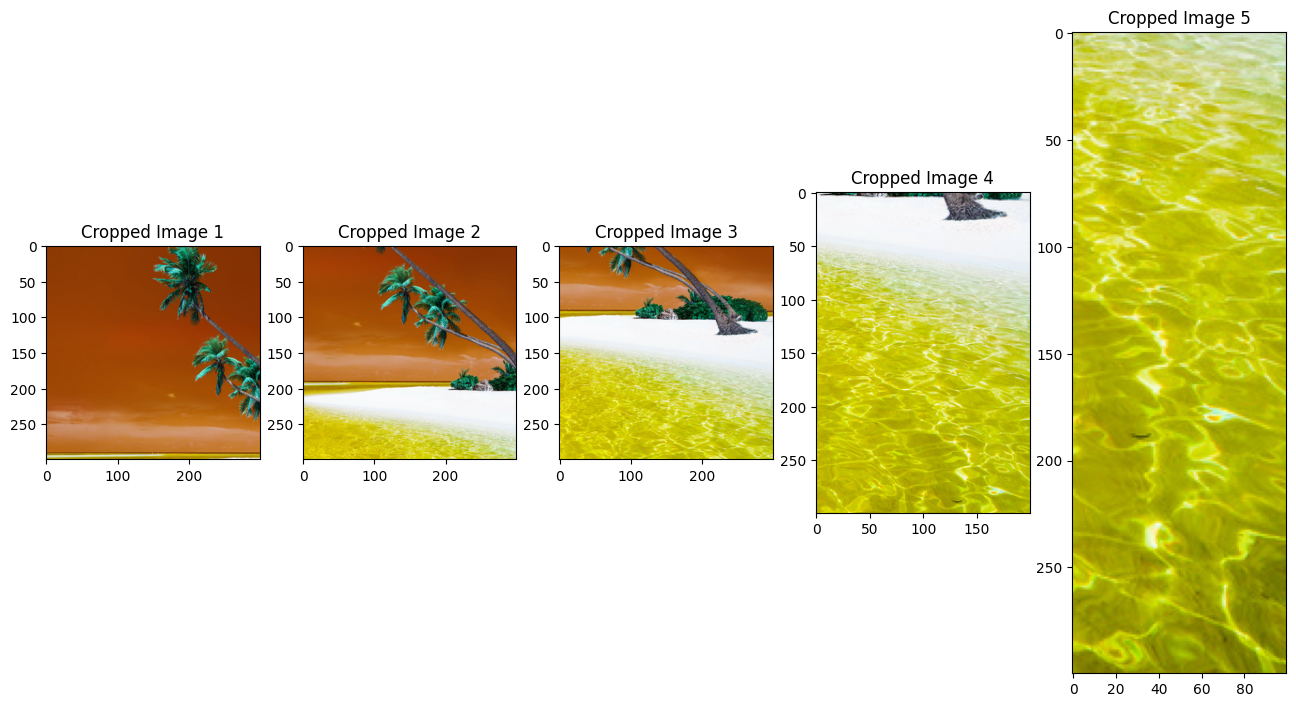

In [38]:
# Cropping an image
cropped_image1 = image[100:400, 100:400]
cropped_image2 = image[200:500, 200:500]
cropped_image3 = image[300:600, 300:600]
cropped_image4 = image[400:700, 400:700]
cropped_image5 = image[500:800, 500:800]

print(cropped_image1.shape)
print(cropped_image2.shape)
print(cropped_image3.shape)
print(cropped_image4.shape)
print(cropped_image5.shape)

plt.figure(figsize=(16, 14))

plt.subplot(1, 5, 1)
plt.imshow(cropped_image1)
plt.title("Cropped Image 1")

plt.subplot(1, 5, 2)
plt.imshow(cropped_image2)
plt.title("Cropped Image 2")

plt.subplot(1, 5, 3)
plt.imshow(cropped_image3)
plt.title("Cropped Image 3")

plt.subplot(1, 5, 4)
plt.imshow(cropped_image4)
plt.title("Cropped Image 4")

plt.subplot(1, 5, 5)
plt.imshow(cropped_image5)
plt.title("Cropped Image 5")

plt.show()

# Image Rotation

We can rotate images by specific angles. Below are the example:

- cv2.ROTATE_90_CLOCKWISE
- cv2.ROTATE_90_COUNTERCLOCKWISE
- cv2.ROTATE_180

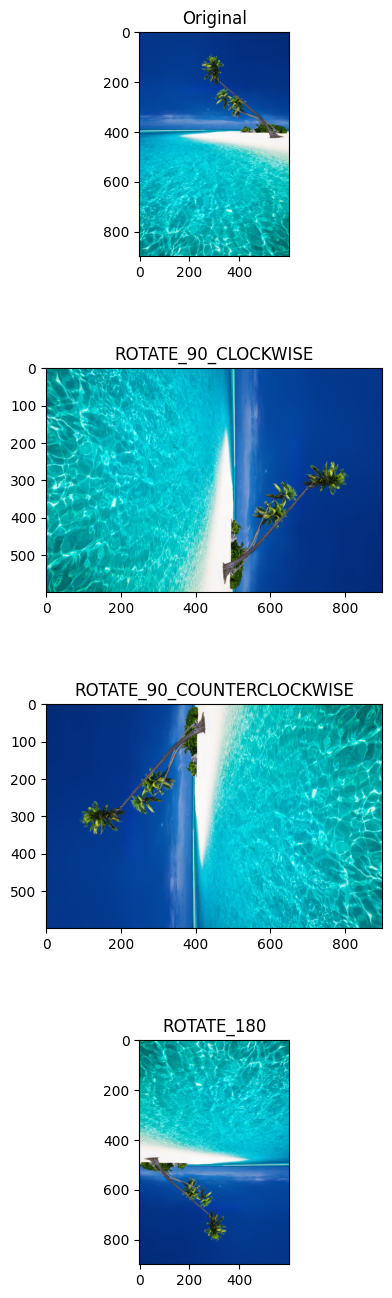

In [10]:
# Rotate

image_r = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rotated_90c = cv2.rotate(image_r, cv2.ROTATE_90_CLOCKWISE)
rotated_90ac = cv2.rotate(image_r, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_180 = cv2.rotate(image_r, cv2.ROTATE_180)

# Display the result
plt.figure(figsize=(20, 16))

plt.subplot(4, 1, 1)
plt.imshow(image_r)
plt.title('Original')

plt.subplot(4, 1, 2)
plt.imshow(rotated_90c)
plt.title('ROTATE_90_CLOCKWISE')

plt.subplot(4, 1, 3)
plt.imshow(rotated_90ac)
plt.title("ROTATE_90_COUNTERCLOCKWISE")

plt.subplot(4, 1, 4)
plt.imshow(rotated_180)
plt.title("ROTATE_180")

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)  # Increase hspace for more vertical spacing

# Image Rotation 2

- getRotationMatrix2D() function generates a 2D rotation matrix that can be used to rotate an image around a specified center point by a given angle.
    - M = cv2.getRotationMatrix2D(center, angle, scale)
    - center : A tuple (x, y) representing the center point around which the image will be rotated. 
    - angle : The angle of rotation in degrees. Positive values indicate counter-clockwise rotation, while negative values indicate clockwise rotation.
    - scale : A scaling factor. A value of 1 means no scaling, values greater than 1 increase the size of the image, and values less than 1 decrease the size.
    - Returns a 2x3 rotation matrix that can be used with cv2.warpAffine() to apply the rotation to an image.
- cv2.warpAffine() function applies an affine transformation to an image. It can be used to perform various transformations such as rotation, translation, and scaling.
- dst = cv2.warpAffine(src, M, dsize)
- src : source image
- M : The 2x3 transformation matrix, which can be obtained from cv2.getRotationMatrix2D() or other transformation functions.
- dsize : The size of the output image as a tuple (width, height). This specifies the dimensions of the resulting image after the transformation.
- Returns the transformed image.


Affine transformations can be represented using a 2x3 transformation matrix. 

Common Affine TRansformation

- Translation : Moves every point of an image or shape by the same amount in a specified direction.
- Scaling : Resizes an image or shape by a scaling factor.
- Rotation : Rotates an image or shape around a specified point (often the center).
- Shearing : Slants the shape of an object along the x or y axis.


The 2x3 transformation matrix is essential in image processing for performing complex transformations in a compact and efficient manner. By manipulating the elements of this matrix, you can achieve various effects such as rotation, scaling, translation, and more.


![2x3 Matrix](./data/2x3_matrix_raw.jpg)

- m00, m11 are scaling factors.
- m01, m10 are used for shearing and rotation.
- m02, m12 are used for translation. 
​
  are scaling factors.

![2x3 Matrix](./data/2x3_matrix.jpg)

x_c, y_c is the center point around which the rotation occurs.





Height and width of original image 900 600


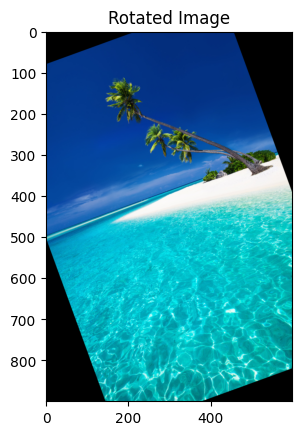

In [11]:
image = cv2.imread('./data/beach-blue.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image_rgb.shape[:2]
print("Height and width of original image", height, width)

# get the coordinates of the center of the image to create the 2D rotation matrix
center = (width/2, height/2)

# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=20, scale=1)

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image_rgb, M=rotate_matrix, dsize=(width, height))

plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.show()



# Flipping Image

Syntax : image = cv2.flip(img, flipCode)

- flipCode = 0: Flips the image vertically (around the x-axis).
- flipCode = 1: Flips the image horizontally (around the y-axis).
- flipCode = -1: Flips the image both vertically and horizontally (180-degree rotation).

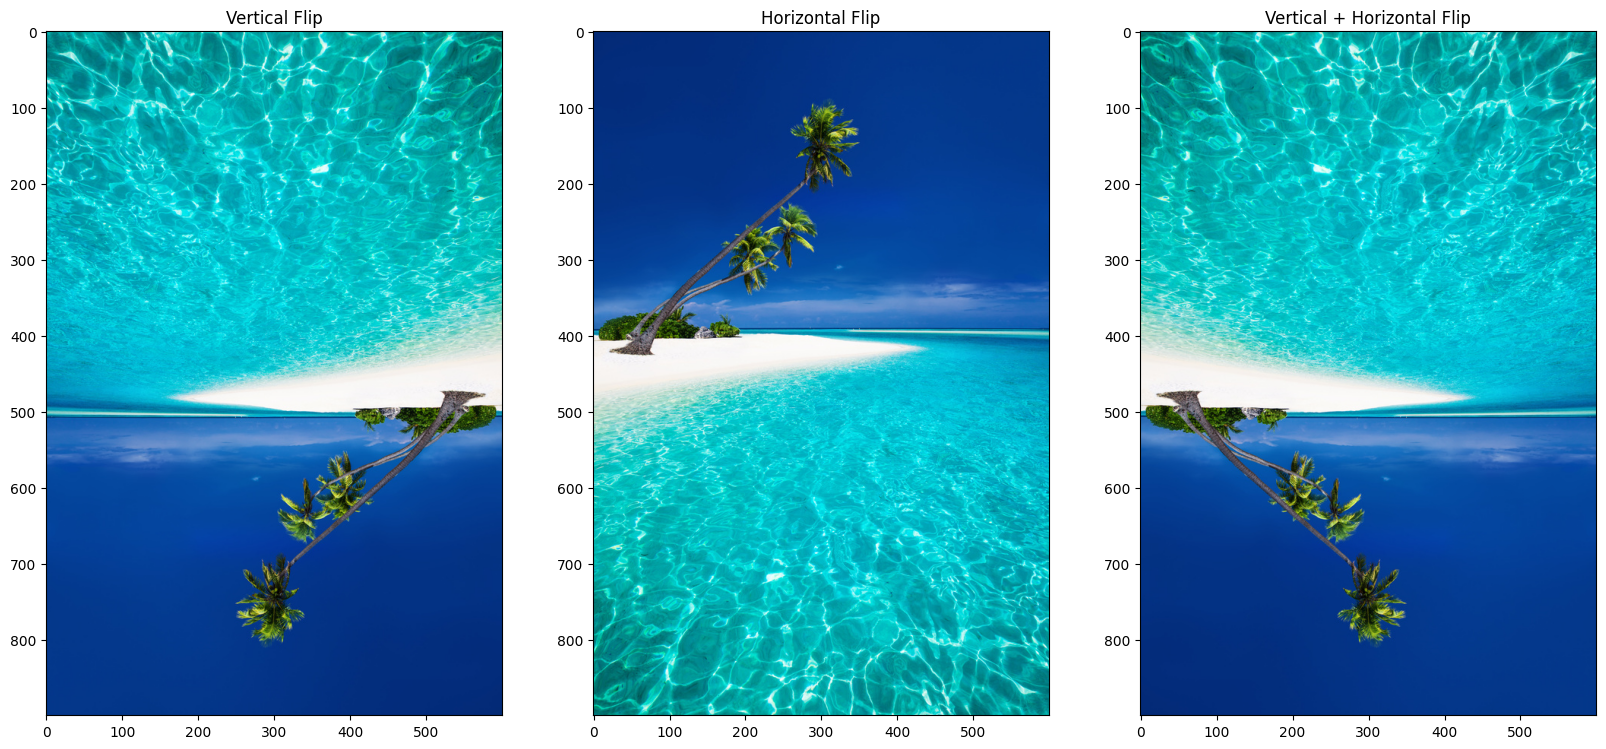

In [12]:
image_f = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flip
flipped_v = cv2.flip(image_f, 0)  # Vertical flip

flipped_h = cv2.flip(image_f, 1)  # Horizontal flip

flipped_vh = cv2.flip(image_f, -1)  # Horizontal flip

# Display the result
plt.figure(figsize=(20, 16))

plt.subplot(1, 3, 1)
plt.imshow(flipped_v)
plt.title("Vertical Flip")

plt.subplot(1, 3, 2)
plt.imshow(flipped_h)
plt.title("Horizontal Flip")

plt.subplot(1, 3, 3)
plt.imshow(flipped_vh)
plt.title("Vertical + Horizontal Flip")

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)  # Increase hspace for more vertical spacing

# Reading from video stream

In [22]:
import cv2

cam_webcam = cv2.VideoCapture(0) # default webcam
# cam_file = cv2.VideoCapture("./data/video.mp4") # default webcam

while True:
    ret, frame = cam_webcam.read()

    # ret, frame = cam_file.read()

    if not ret:
        break

    cv2.imshow("Video webcam", frame)
    # Simple hack
    # cv2.imwrite("./data/temp.jpg", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam_webcam.release()
cv2.destroyAllWindows()

### Assignment 1 :


Record a video or download a timelapse video of evening where the transition of day to evening or evening to night is visible clearly. 

Video condition : any of below
1. Day to evening
2. Evening to Night
3. Night to Morning/Day

- Input : video file path
- Output : 40% is Day/Evening, 60% is Night/Evening
- Output : 20 Early morning, 10% night, 70% Day

- Example Video Link : https://www.youtube.com/watch?v=jNEjw1fMk-8